In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv('HRData.csv')

df.head()

,Age,AttritionBoolean,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


In [2]:
df.shape

(1470, 33)

In [3]:
df.describe()

,Age,AttritionBoolean,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.dtypes

Age                          int64
AttritionBoolean             int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [5]:
df.isnull().sum()

Age                         0
AttritionBoolean            0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

C:\Users\suraj\AppData\Local\Temp\ipykernel_44612\3955491131.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


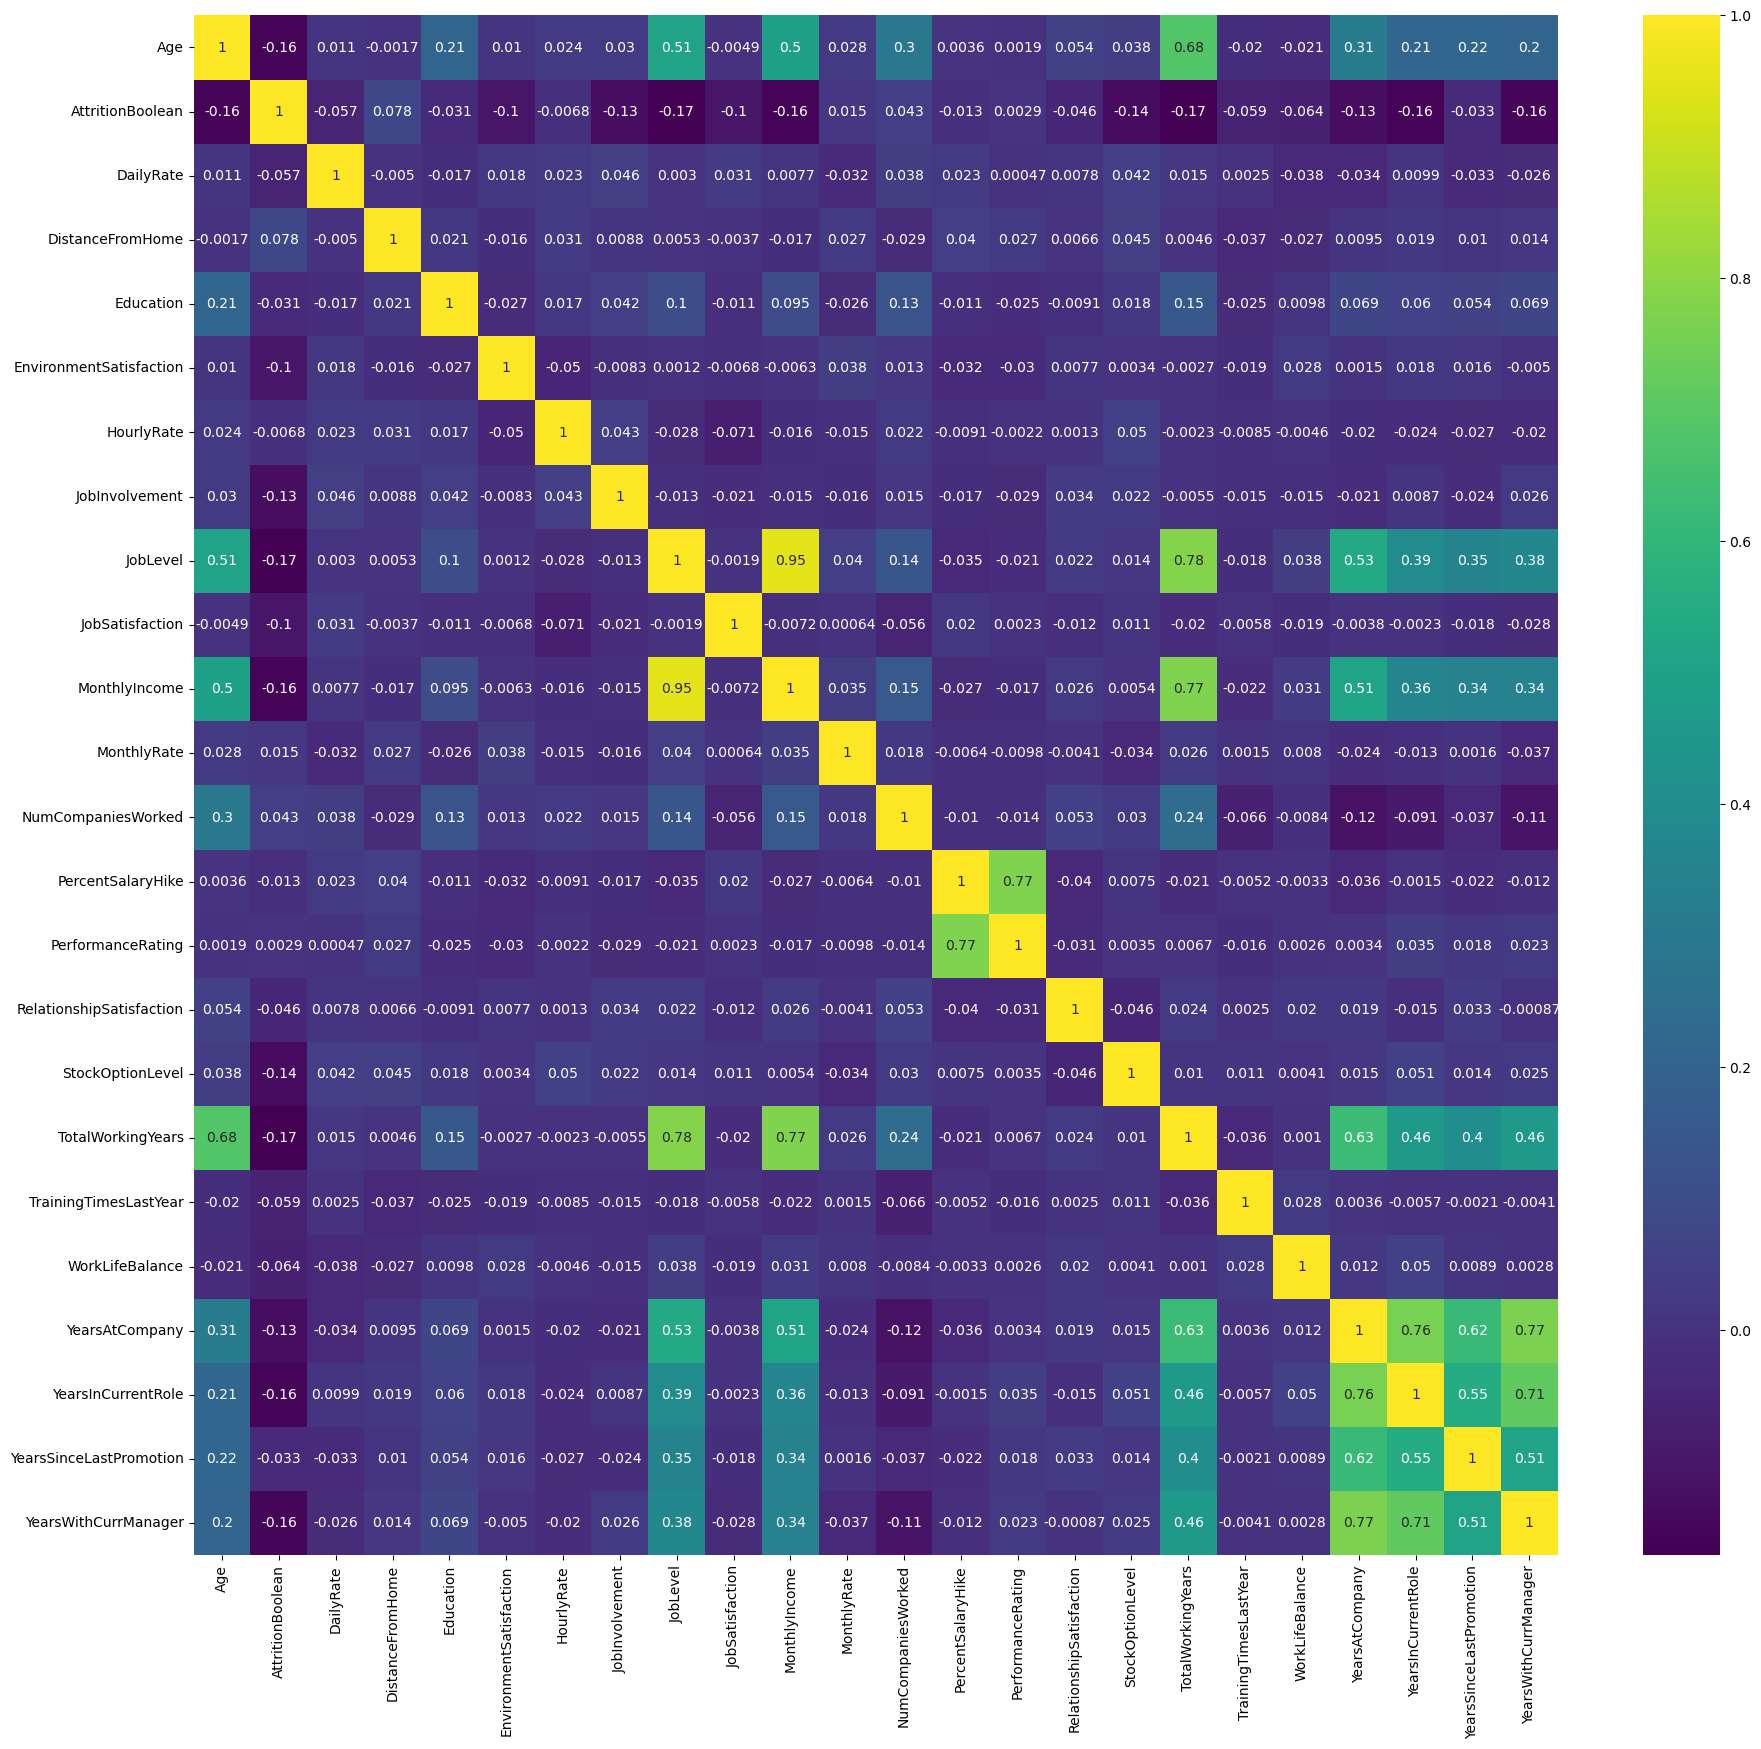

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize = (22,20))
sns.heatmap(correlation_matrix, annot = True, cmap ='viridis')
plt.show()

In [7]:
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

No     1233
Yes     237
Name: Attrition, dtype: int64


   Age  AttritionBoolean Attrition     BusinessTravel  DailyRate  \
0   41                 1       Yes      Travel_Rarely       1102   
1   49                 0        No  Travel_Frequently        279   
2   37                 1       Yes      Travel_Rarely       1373   
3   33                 0        No  Travel_Frequently       1392   
4   27                 0        No      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                        

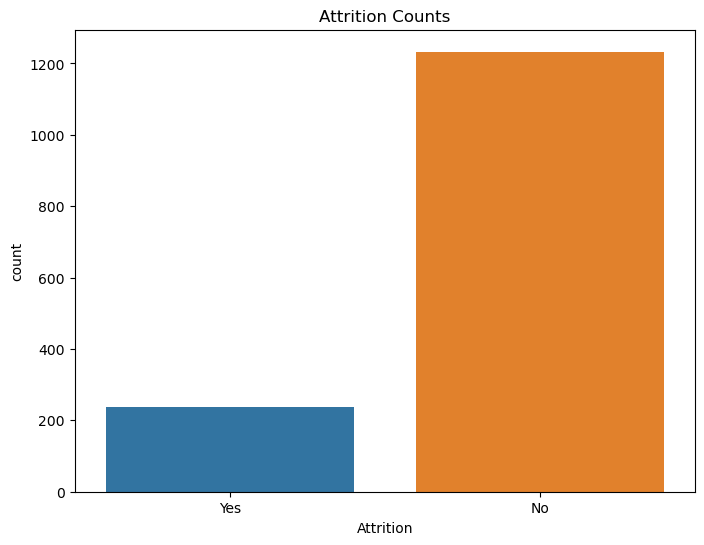

C:\Users\suraj\AppData\Local\Temp\ipykernel_44612\2919590176.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


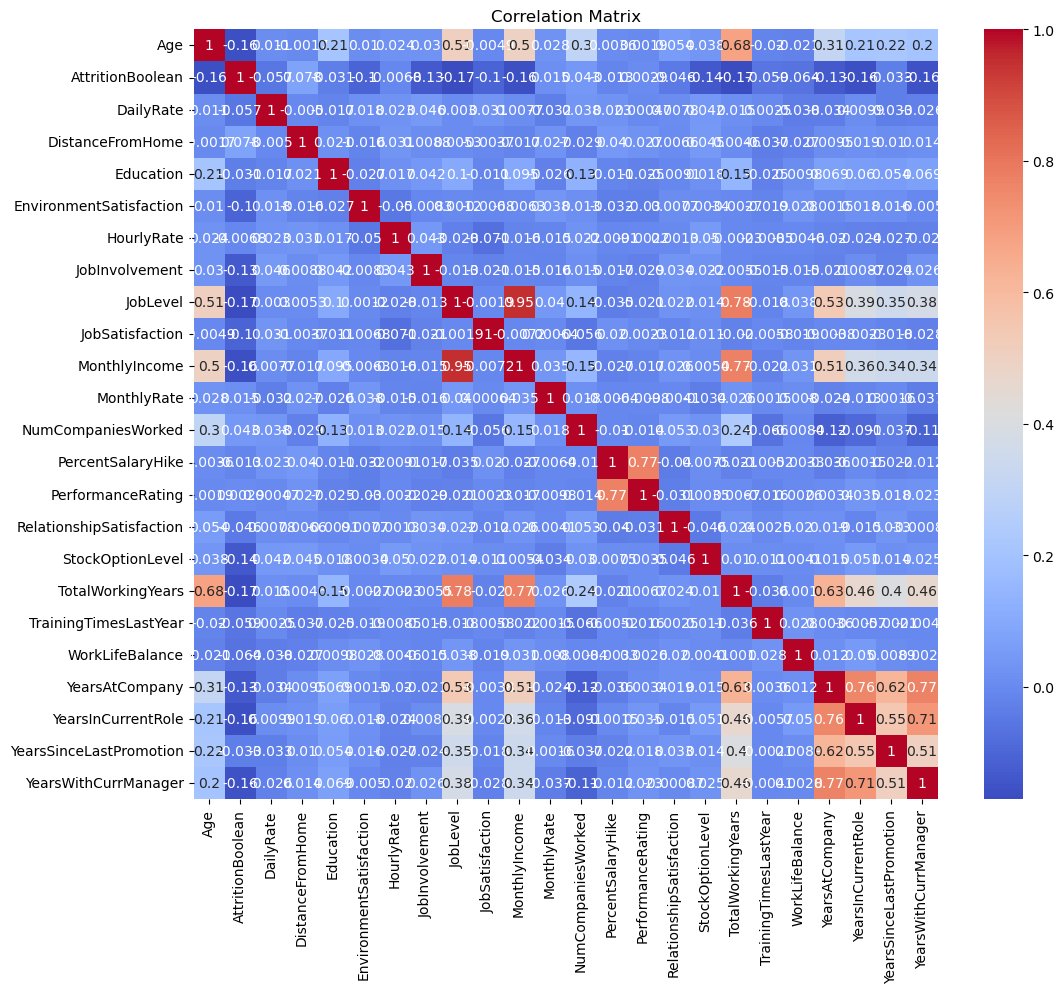

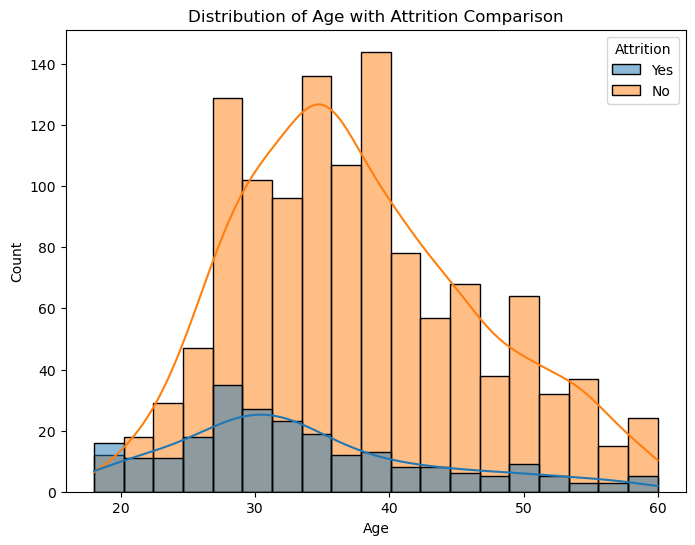

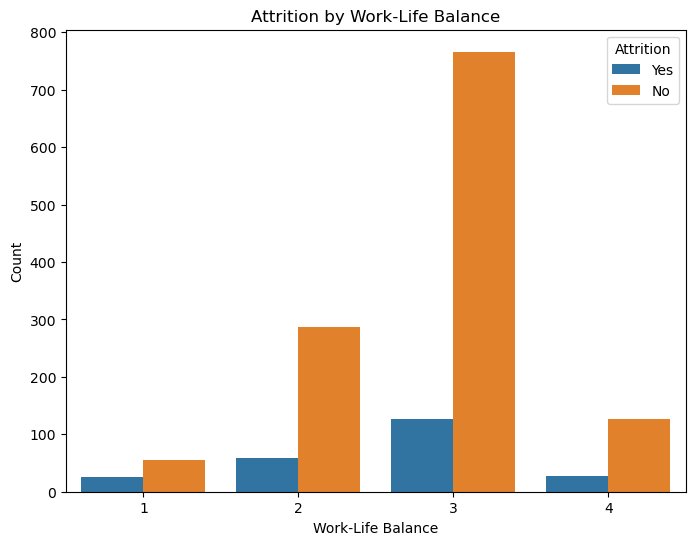

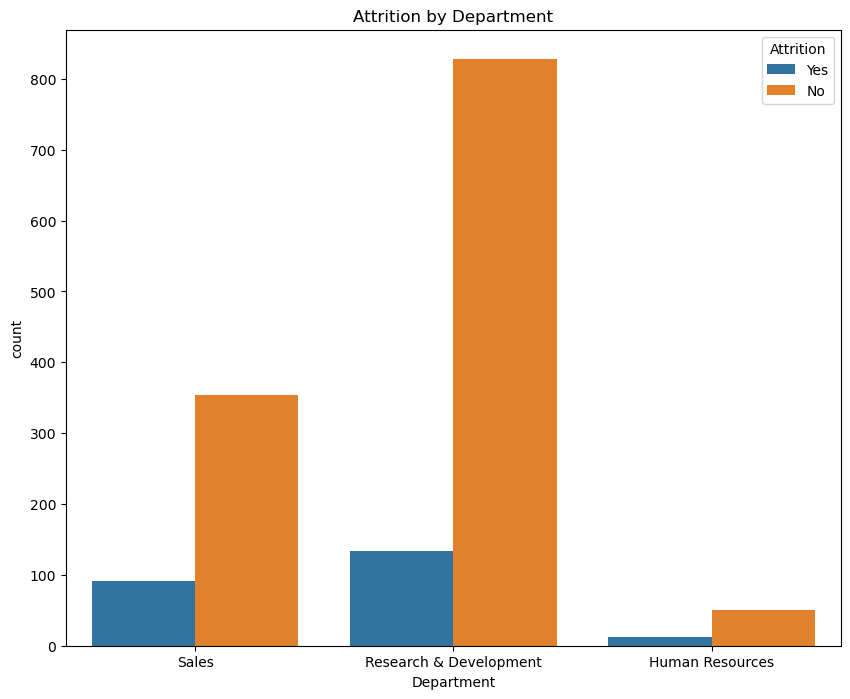

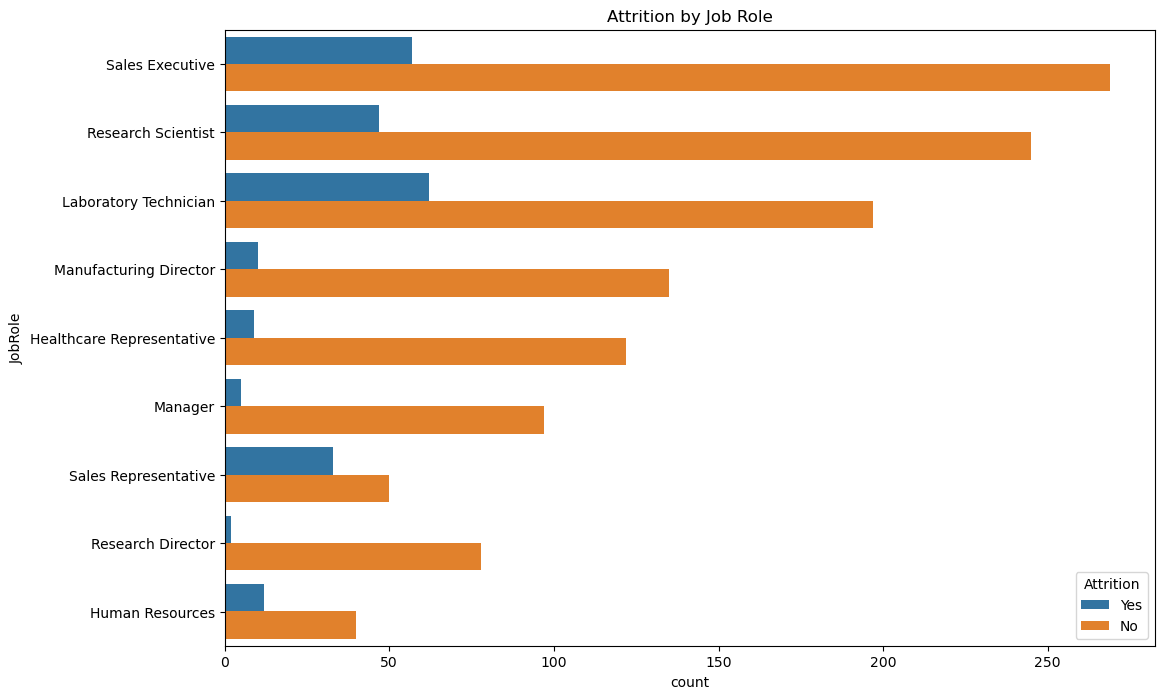

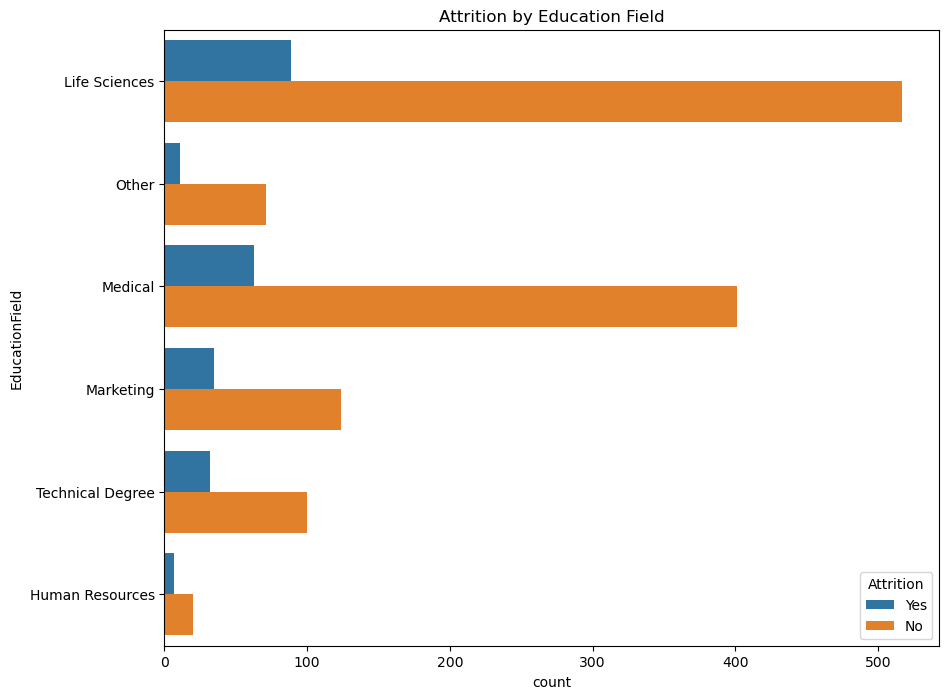

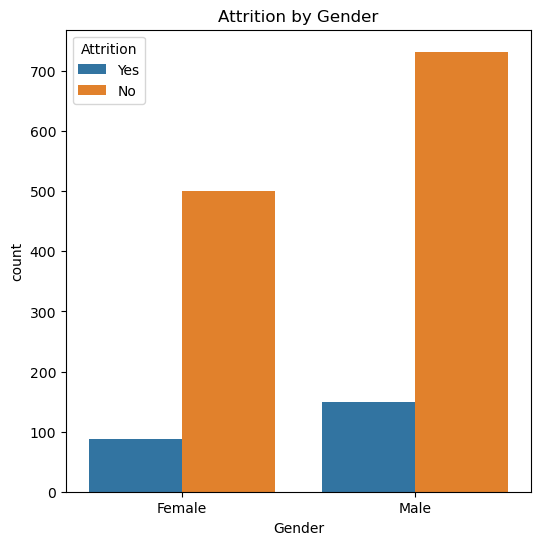

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset into a DataFrame
df = pd.read_csv('HRData.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Check the summary statistics of numerical columns
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# Count the number of attritions
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

# Visualize the attrition counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Counts')
plt.show()

# Explore the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title('Distribution of Age with Attrition Comparison')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

# Visualize attrition by department
plt.figure(figsize=(10, 8))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()

# Explore attrition by job role
plt.figure(figsize=(12, 8))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title('Attrition by Job Role')
plt.show()

# Explore attrition by education field
plt.figure(figsize=(10, 8))
sns.countplot(y='EducationField', hue='Attrition', data=df)
plt.title('Attrition by Education Field')
plt.show()

# Explore attrition by gender
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.show()

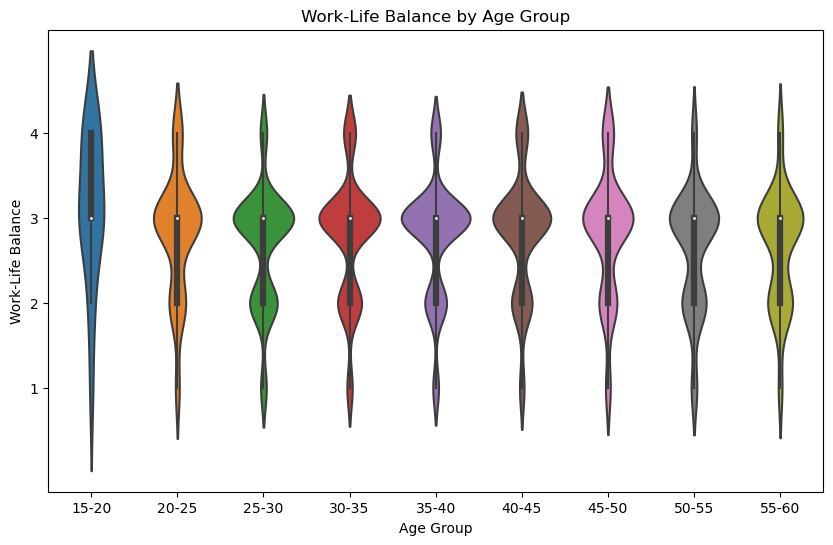

In [9]:
# Define the age bins
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
age_labels = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']

# Create a new column 'AgeGroup' by binning the 'Age' variable
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot the work-life balance by age group using a strip plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='AgeGroup', y='WorkLifeBalance', data=df)
plt.title('Work-Life Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Work-Life Balance')
plt.yticks([1, 2, 3, 4])  # Set the y-axis tick labels
plt.show()

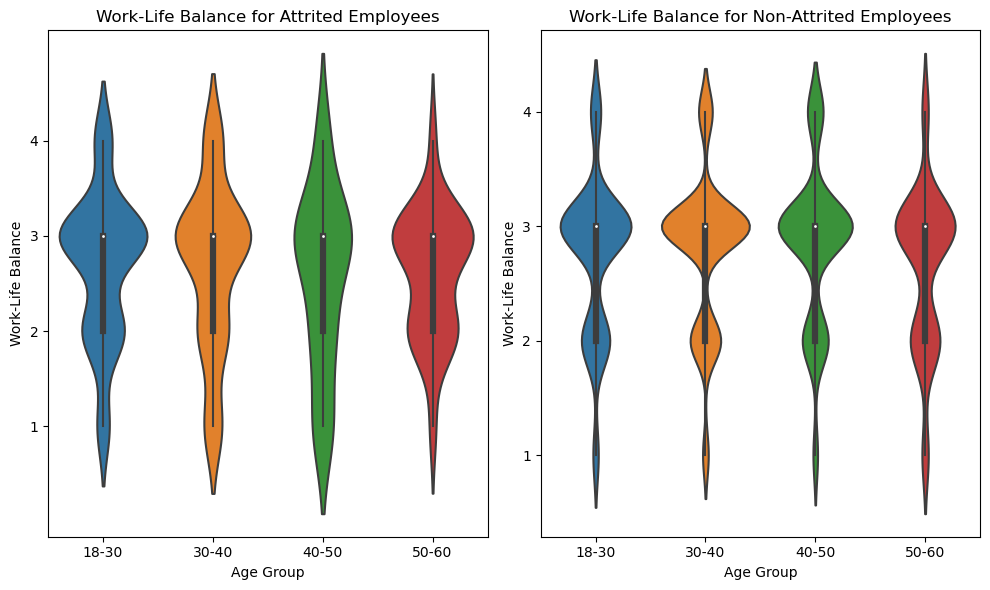

In [10]:
# Define the age bins
age_bins = [18, 30, 40, 50, 60]
age_labels = ['18-30', '30-40', '40-50', '50-60']

# Create a new column 'AgeGroup' by binning the 'Age' variable
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create separate dataframes for attrited and non-attrited employees
attrited_df = df[df['AttritionBoolean'] == 1]
non_attrited_df = df[df['AttritionBoolean'] == 0]

# Plot violin plots for attrited and non-attrited employees
plt.figure(figsize=(10, 6))

# Violin plot for attrited employees
plt.subplot(1, 2, 1)
sns.violinplot(x='AgeGroup', y='WorkLifeBalance', data=attrited_df)
plt.title('Work-Life Balance for Attrited Employees')
plt.xlabel('Age Group')
plt.ylabel('Work-Life Balance')
plt.yticks([1, 2, 3, 4])

# Violin plot for non-attrited employees
plt.subplot(1, 2, 2)
sns.violinplot(x='AgeGroup', y='WorkLifeBalance', data=non_attrited_df)
plt.title('Work-Life Balance for Non-Attrited Employees')
plt.xlabel('Age Group')
plt.ylabel('Work-Life Balance')
plt.yticks([1, 2, 3, 4])

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()


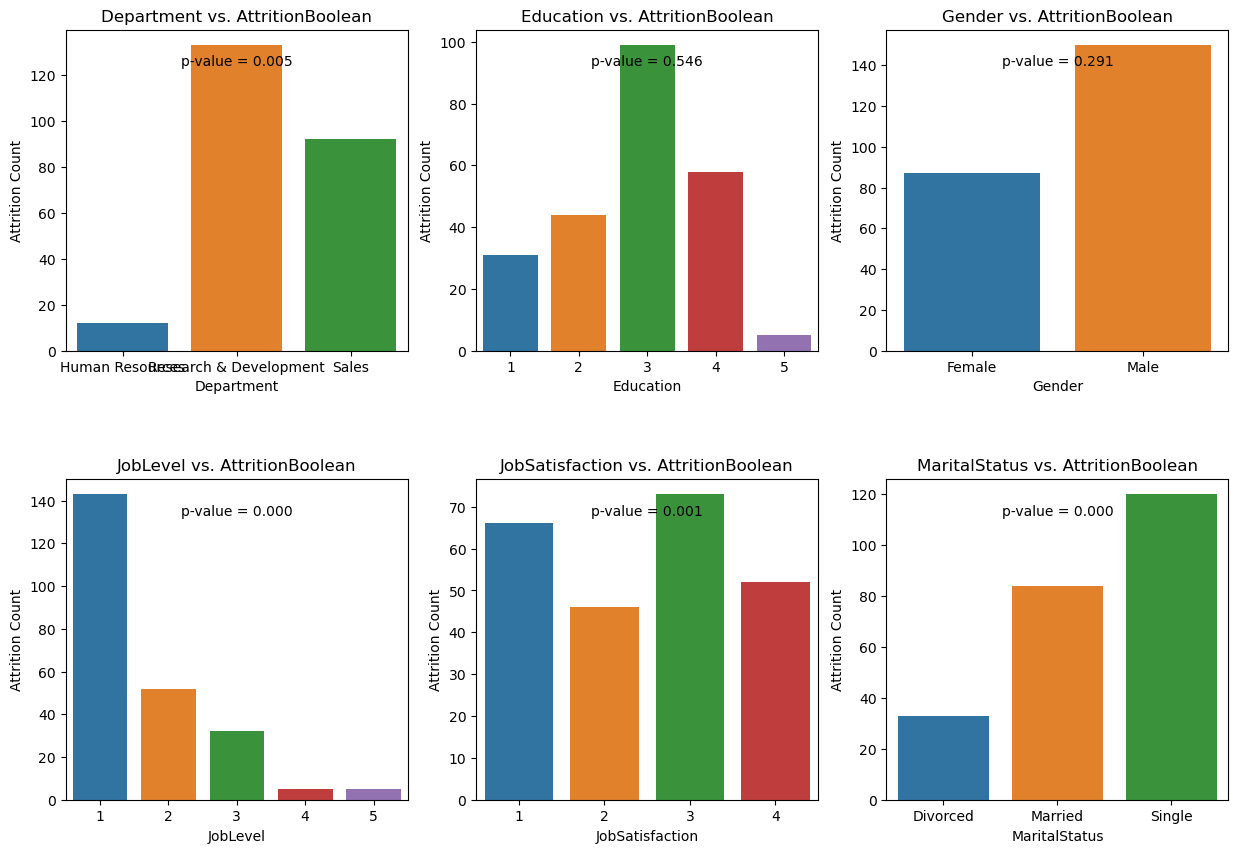

In [11]:
from scipy.stats import chi2_contingency
# Select the variables of interest
variables = ['Department', 'Education', 'Gender', 'JobLevel', 'JobSatisfaction', 'MaritalStatus']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)  # Adjust the vertical spacing between subplots

# Iterate over the variables and plot bar plots
for i, var in enumerate(variables):
    row = i // 3  # Determine the row position of the subplot
    col = i % 3   # Determine the column position of the subplot
    
    # Create a cross-tabulation between the variable and AttritionBoolean
    cross_tab = pd.crosstab(df[var], df['AttritionBoolean'])
    
    # Plot the bar plot
    sns.barplot(x=cross_tab.index, y=cross_tab[1], ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs. AttritionBoolean')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Attrition Count')

    # Perform chi-square test for association between the variable and AttritionBoolean
    chi2, p, _, _ = chi2_contingency(cross_tab)
    axes[row, col].text(0.5, 0.9, f'p-value = {p:.3f}', ha='center', va='center',
                        transform=axes[row, col].transAxes)

plt.show()

In [12]:
# Calculate the distribution of the target variable
target_counts = df['AttritionBoolean'].value_counts()

# Get the most frequent class
most_frequent_class = target_counts.idxmax()

# Calculate the baseline accuracy
baseline_accuracy = target_counts[most_frequent_class] / target_counts.sum()

print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8387755102040816


n_neighbors: 9 | Fold 1 Accuracy: 0.8367346938775511
n_neighbors: 9 | Fold 2 Accuracy: 0.8333333333333334
n_neighbors: 9 | Fold 3 Accuracy: 0.8197278911564626
n_neighbors: 9 | Fold 4 Accuracy: 0.8163265306122449
n_neighbors: 9 | Fold 5 Accuracy: 0.8163265306122449
n_neighbors: 9 | Mean Accuracy: 0.8244897959183675


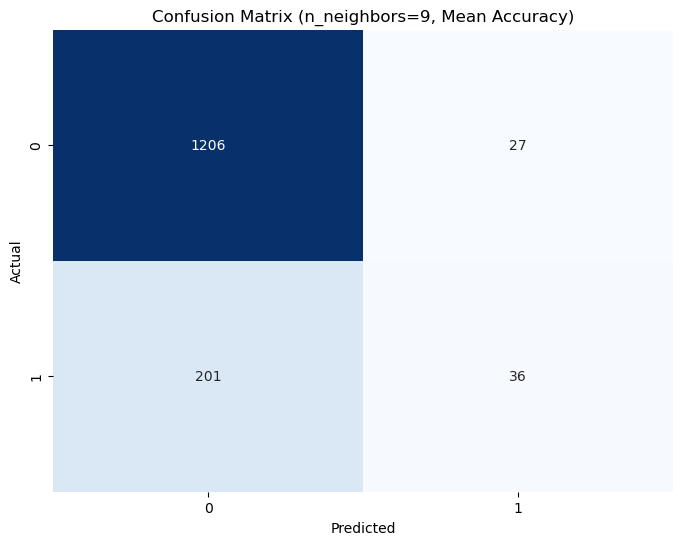


n_neighbors: 11 | Fold 1 Accuracy: 0.8503401360544217
n_neighbors: 11 | Fold 2 Accuracy: 0.8367346938775511
n_neighbors: 11 | Fold 3 Accuracy: 0.8469387755102041
n_neighbors: 11 | Fold 4 Accuracy: 0.8333333333333334
n_neighbors: 11 | Fold 5 Accuracy: 0.8163265306122449
n_neighbors: 11 | Mean Accuracy: 0.8367346938775512


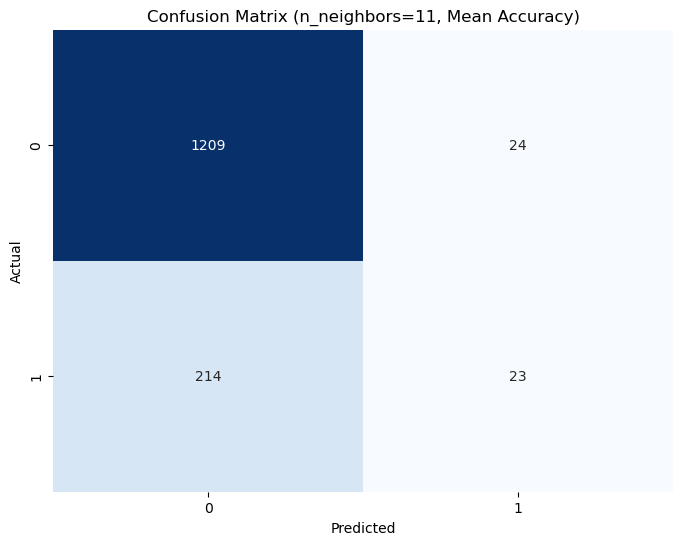

In [17]:
# Define the features and target variable
features = ['Age', 'Department', 'JobLevel', 'JobSatisfaction', 'MaritalStatus']
target = 'AttritionBoolean'
X = df[features]
y = df[target]

# Perform one-hot encoding on categorical variables
X = pd.get_dummies(X)

# Create a list of different n_neighbors values to test
n_neighbors_values = [9, 11]

# Iterate over the n_neighbors values
for n_neighbors in n_neighbors_values:
    # Create the K-NN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Perform cross-validation and calculate accuracy scores
    accuracy_scores = cross_val_score(knn, X, y, cv=5)

    # Print the accuracy scores for each fold and generate confusion matrix
    for i, accuracy in enumerate(accuracy_scores):
        print("n_neighbors:", n_neighbors, "| Fold", i+1, "Accuracy:", accuracy)

    # Calculate the mean accuracy across all folds
    mean_accuracy = accuracy_scores.mean()
    print("n_neighbors:", n_neighbors, "| Mean Accuracy:", mean_accuracy)

    # Fit the K-NN classifier and make predictions
    knn.fit(X, y)
    y_pred = knn.predict(X)

    # Generate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix (n_neighbors={n_neighbors}, Mean Accuracy)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print()



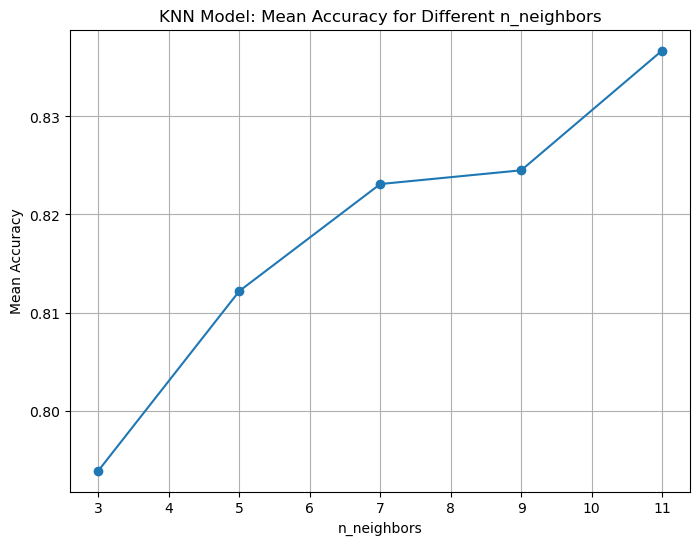

In [46]:
# Accuracy scores for different n_neighbors values
n_neighbors_values = [3, 5, 7, 9, 11]
accuracy_scores_mean = [0.7939, 0.8122, 0.8231, 0.8245, 0.8367]

# Plotting the mean accuracy scores
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_values, accuracy_scores_mean, marker='o', linestyle='-')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Accuracy')
plt.title('KNN Model: Mean Accuracy for Different n_neighbors')
plt.grid(True)
plt.show()


C: 10 | Fold 1 Accuracy: 0.8435374149659864
C: 10 | Fold 2 Accuracy: 0.8435374149659864
C: 10 | Fold 3 Accuracy: 0.8435374149659864
C: 10 | Fold 4 Accuracy: 0.8367346938775511
C: 10 | Fold 5 Accuracy: 0.8367346938775511
C: 10 | Mean Accuracy: 0.8408163265306122


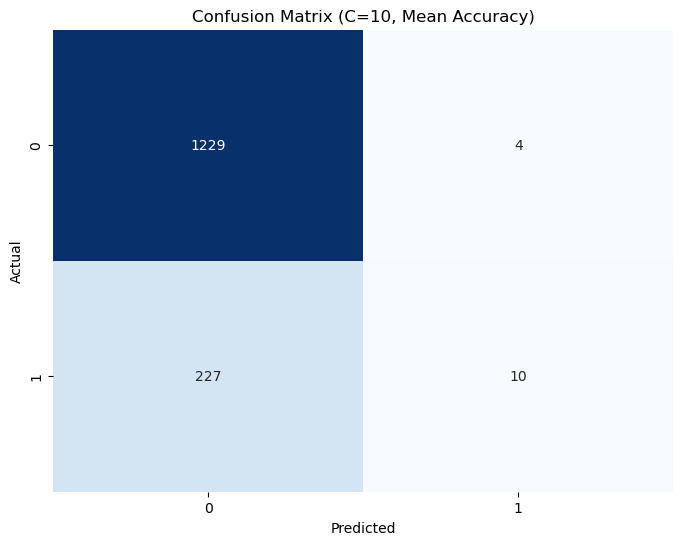


C: 100 | Fold 1 Accuracy: 0.8435374149659864
C: 100 | Fold 2 Accuracy: 0.8435374149659864
C: 100 | Fold 3 Accuracy: 0.8435374149659864
C: 100 | Fold 4 Accuracy: 0.8367346938775511
C: 100 | Fold 5 Accuracy: 0.8367346938775511
C: 100 | Mean Accuracy: 0.8408163265306122


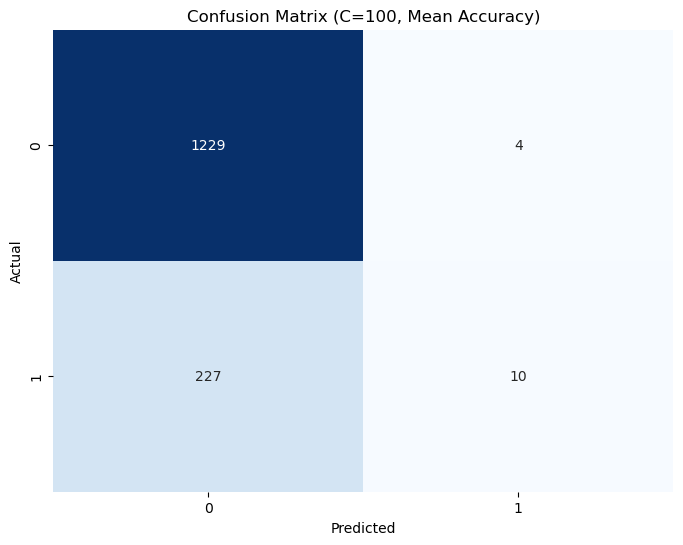

In [22]:
# Define the features and target variable
features = ['Age', 'Department', 'JobLevel', 'JobSatisfaction', 'MaritalStatus']
target = 'AttritionBoolean'
X = df[features]
y = df[target]

# Perform one-hot encoding on categorical variables
X = pd.get_dummies(X)

# Create a list of different C values to test
C_values = [10, 100]

# Iterate over the C values
for C in C_values:
    # Create the Logistic Regression model
    logistic_regression = LogisticRegression(max_iter=1000, C=C)

    # Perform cross-validation and calculate accuracy scores
    accuracy_scores = cross_val_score(logistic_regression, X, y, cv=5)

    # Print the accuracy scores for each fold and generate confusion matrix
    for i, accuracy in enumerate(accuracy_scores):
        print("C:", C, "| Fold", i+1, "Accuracy:", accuracy)

    # Calculate the mean accuracy across all folds
    mean_accuracy = accuracy_scores.mean()
    print("C:", C, "| Mean Accuracy:", mean_accuracy)

    # Fit the logistic regression model and make predictions
    logistic_regression.fit(X, y)
    y_pred = logistic_regression.predict(X)

    # Generate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix (C={C}, Mean Accuracy)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print()

n_estimators: 50 | Fold 1 Accuracy: 0.7857142857142857
n_estimators: 50 | Fold 2 Accuracy: 0.7789115646258503
n_estimators: 50 | Fold 3 Accuracy: 0.7789115646258503
n_estimators: 50 | Fold 4 Accuracy: 0.7925170068027211
n_estimators: 50 | Fold 5 Accuracy: 0.7687074829931972
n_estimators: 50 | Mean Accuracy: 0.7809523809523811


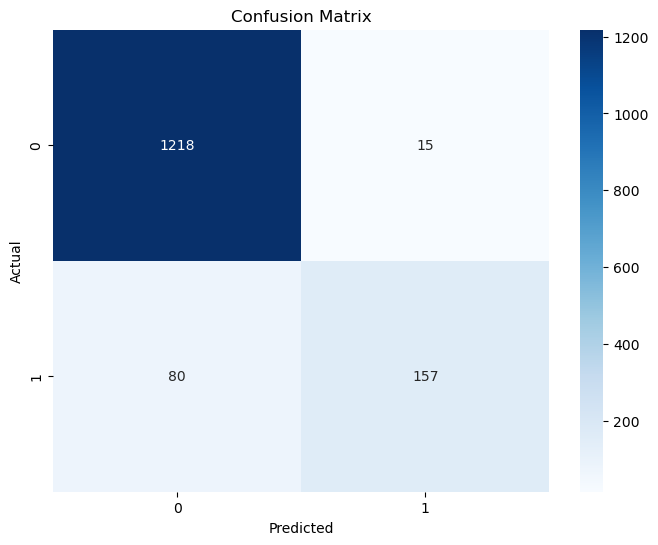

n_estimators: 100 | Fold 1 Accuracy: 0.7619047619047619
n_estimators: 100 | Fold 2 Accuracy: 0.7755102040816326
n_estimators: 100 | Fold 3 Accuracy: 0.7721088435374149
n_estimators: 100 | Fold 4 Accuracy: 0.782312925170068
n_estimators: 100 | Fold 5 Accuracy: 0.7755102040816326
n_estimators: 100 | Mean Accuracy: 0.773469387755102


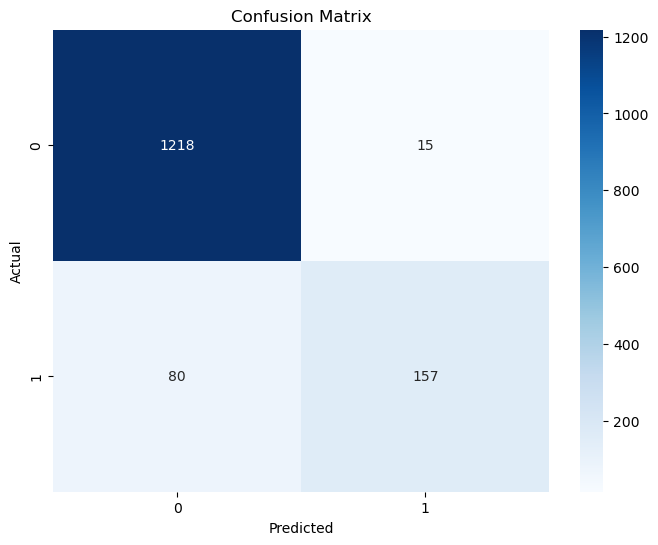

n_estimators: 150 | Fold 1 Accuracy: 0.7653061224489796
n_estimators: 150 | Fold 2 Accuracy: 0.7755102040816326
n_estimators: 150 | Fold 3 Accuracy: 0.7789115646258503
n_estimators: 150 | Fold 4 Accuracy: 0.7857142857142857
n_estimators: 150 | Fold 5 Accuracy: 0.7721088435374149
n_estimators: 150 | Mean Accuracy: 0.7755102040816326


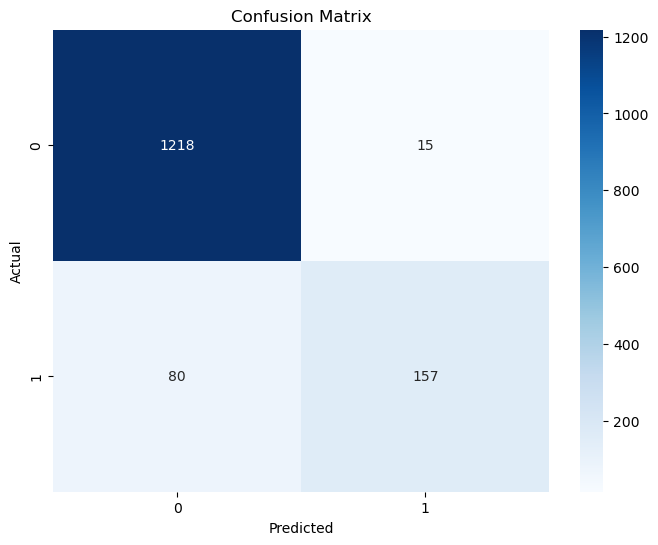

n_estimators: 200 | Fold 1 Accuracy: 0.7687074829931972
n_estimators: 200 | Fold 2 Accuracy: 0.7789115646258503
n_estimators: 200 | Fold 3 Accuracy: 0.7789115646258503
n_estimators: 200 | Fold 4 Accuracy: 0.7857142857142857
n_estimators: 200 | Fold 5 Accuracy: 0.7721088435374149
n_estimators: 200 | Mean Accuracy: 0.7768707482993197


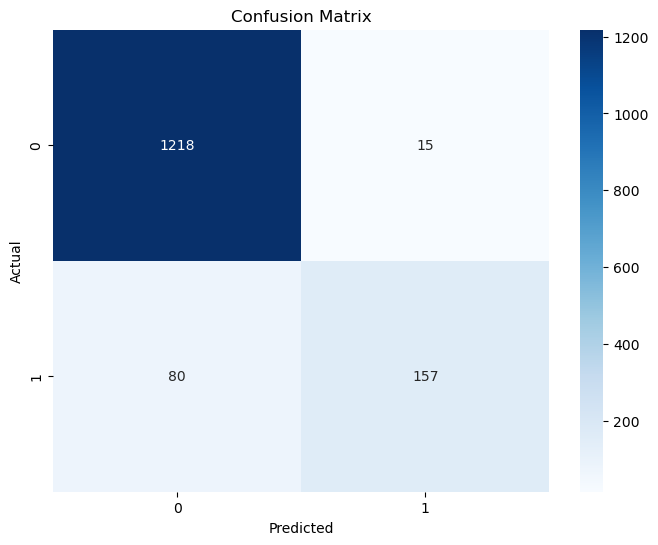

In [27]:
# Define the features and target variable
features = ['Age', 'Department', 'JobLevel', 'JobSatisfaction', 'MaritalStatus']
target = 'AttritionBoolean'
X = df[features]
y = df[target]

# Perform one-hot encoding on categorical variables
X = pd.get_dummies(X)

# Create a list of different n_estimators values to test
n_estimators_values = [50, 100, 150, 200]

# Iterate over the n_estimators values
for n_estimators in n_estimators_values:
    # Create the Random Forest classifier
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Perform cross-validation and calculate accuracy scores
    accuracy_scores = cross_val_score(random_forest, X, y, cv=5)

    # Print the accuracy scores for each fold
    for i, accuracy in enumerate(accuracy_scores):
        print("n_estimators:", n_estimators, "| Fold", i+1, "Accuracy:", accuracy)

    # Calculate the mean accuracy across all folds
    mean_accuracy = accuracy_scores.mean()
    print("n_estimators:", n_estimators, "| Mean Accuracy:", mean_accuracy)

    # Fit the model on the entire dataset
    random_forest.fit(X, y)

    # Predict the target variable
    y_pred = random_forest.predict(X)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


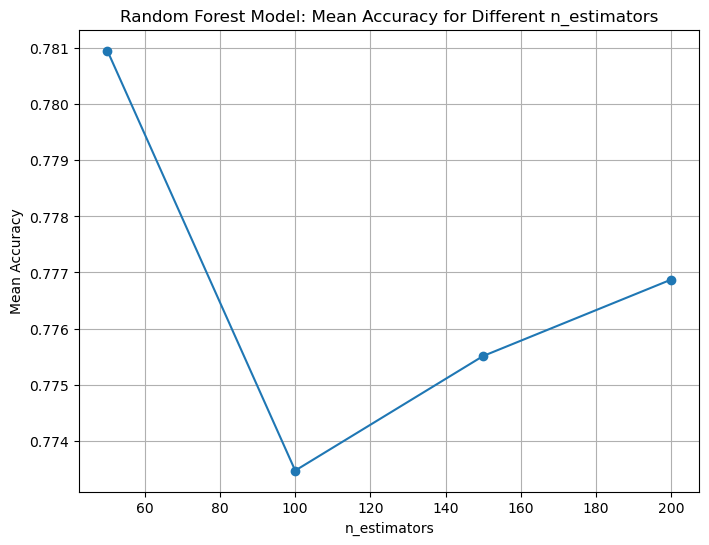

In [29]:
# Plot the mean accuracy scores
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, mean_accuracy_scores, marker='o', linestyle='-')
plt.xlabel('n_estimators')
plt.ylabel('Mean Accuracy')
plt.title('Random Forest Model: Mean Accuracy for Different n_estimators')
plt.grid(True)
plt.show()
